In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Set index_col=0 to use the first column as the index.
%matplotlib inline


df = pd.read_csv("ClassifiedData.csv",index_col=0)
%matplotlib inline

df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
#ایمپورت کردن کتابخانه مورد نظر

from sklearn.preprocessing import StandardScaler


In [5]:
#انتخاب کردن یک نام برای آن 

scaler=StandardScaler()


In [6]:
#فیت کردن آن روی همه به جز تارگت 

scaler.fit(df.drop('TARGET CLASS' , axis=1))


StandardScaler()

In [7]:
 #تمام دیتا را به جز تارگت را ترنسفورم میکنیم و نام آن را اسکیلد فیچر می گذاریم

scaled_features=scaler.transform(df.drop('TARGET CLASS' , axis=1))


In [8]:
#برای آنکه خروجی به شکل آرایه نباشد و به در قالب دیتا فریم باشد از دستور زیر استفاده میکنیم
#نام ستون ها را نیز از موارد قبلی استفاده کن به جز مورد آخر
df_feat=pd.DataFrame(scaled_features, columns=df.columns[:-1])


In [9]:
df_feat.head()


,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(scaled_features , df['TARGET CLASS'] , test_size=0.30)

In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
knn = KNeighborsClassifier(n_neighbors=1)


In [22]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(X_test)


Evaluations
Let's evaluate our KNN model!

In [24]:
from sklearn.metrics import classification_report,confusion_matrix


In [25]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       135
           1       0.90      0.92      0.91       165

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value:



In [26]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

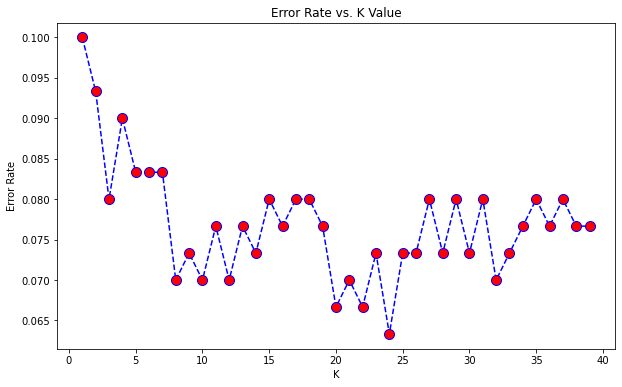

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!



In [28]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[118  17]
 [ 13 152]]


              precision    recall  f1-score   support

           0       0.90      0.87      0.89       135
           1       0.90      0.92      0.91       165

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [29]:
# NOW WITH K=17
knn = KNeighborsClassifier(n_neighbors=17)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=17')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=17


[[119  16]
 [  8 157]]


              precision    recall  f1-score   support

           0       0.94      0.88      0.91       135
           1       0.91      0.95      0.93       165

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



Great job!
We were able to squeeze some more performance out of our model by tuning to a better K value!